# Assignment 1: Group 7

## Part 1

For this part there needs to be some data manipulation done before calculation can proceed. As it says in the assignment, first the data points from before 1.jan 2017 will be discarded, but also those columns and rows that are have all NaN values. Secondly, the date will be set as the index and pandas pivot_table function will be used to get the names of the cryptos as the headers, populated with the values from the close column, since that is the only one required for the calculations in this part. To make things easier on our system, this data frame will be exported to a csv file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly.express as px

%matplotlib inline
plt.style.use('fivethirtyeight')
# importing the data
df = pd.read_csv("crypto-markets.csv", parse_dates = ["date"], index_col = 3)
# subsetting the data frame
df = df[['name', 'close']]
df = df['2017-01-01':]
# manipulating the data frame to get the log return data and pivoting the data frame
df = df.pivot_table(index = df.index, columns = 'name', values = 'close')
log_ret = np.log(df/df.shift(1))
log_ret = log_ret.dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'all')
# exporting to a csv - run only if you need to
# log_ret.to_csv("main.csv")

From here the calculations are done. I wont elaborate more on this as it follows the instructions of the assignment.

In [25]:
random.seed(123)
log_ret = pd.read_csv("main.csv", parse_dates = ["date"], index_col = 0)
log_ret = log_ret.dropna(axis = 1, how = "all").dropna(axis = 0, how = "all")

vol = log_ret.std()
results = pd.DataFrame(columns = ["Size", "Return", "Volatility"])
for i in range(1000):
    randomcryptos = random.randint(1, 30)
    cryptos = random.sample(range(1,2070), randomcryptos)
    randomday = random.sample(range(1,698), 1)
    size = len(cryptos)
    mean = log_ret.iloc[randomday, cryptos].mean(axis = 1)
    std = np.sqrt(vol.iloc[cryptos].sum())/len(cryptos)
    results = results.append({"Size": size, "Return": mean[0], "Volatility": std}, ignore_index = True)

df = results.sort_values(by = "Size", ascending = False)
df2 = df.groupby('Size').mean()

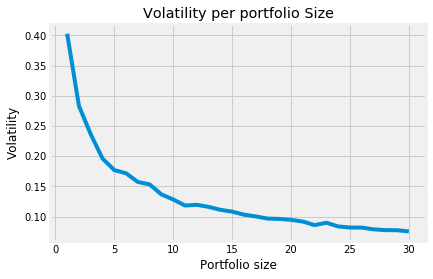

In [26]:
plt.plot(df2["Volatility"])
plt.title("Volatility per portfolio Size")
plt.xlabel("Portfolio size")
plt.ylabel("Volatility")
plt.show()

In [27]:

# For interactive graph uncomment this part and run.
# This will only be shown at the github repo
fig = px.line(df2, x=df2.index, y="Volatility")
fig.update_layout(title='Volatility per Portfolio Size',
                   xaxis_title='Size of Portfolios',
                   yaxis_title='Volatility')
fig.show()


In [29]:
print("Return describtive statistics")
display(df2["Return"].describe())
print("================================================")
print("Volatility describtive statistics")
display(df2["Volatility"].describe())

Return describtive statistics


count    30.000000
mean      0.000685
std       0.025738
min      -0.038625
25%      -0.017521
50%      -0.004226
75%       0.014802
max       0.085261
Name: Return, dtype: float64

Volatility describtive statistics


count    30.000000
mean      0.130919
std       0.071457
min       0.075322
25%       0.086746
50%       0.105576
75%       0.149010
max       0.402605
Name: Volatility, dtype: float64